# Analyse et visualisation des données pour le projet optimisatuion des trajets

## Un petit Contexte
Ce notebook présente une analyse et une visualisation des données
de trajets à chaque fois entre un point fixe appelé "dépôt" qui est la Gare de Lyon et différents points collectés dans Paris intra-muros. Les différents points correspondent à plusieurs catégorie de lieux qui peuvent être amenés à recevoir des colis obtenus grâce à OpenStreetMap. L'objectif est de comprendre la distribution des trajets, leurs caractéristiques et leur répartition dans l'espace.

## Objectifs
- Analyser les distributions des durées et des distances des trajets
- Étudier la relation entre distance et temps
- Identifier des zones à l’aide d’un clustering
- Vérifier visuellement la cohérence de la zone de collecte des données

**Remarque**  
Ce notebook est conçu uniquement pour avoir une vision ainsi qu'une compréhension claire des données de notre dataset.
Le projet est réalisé via
le script `main.py` du dépôt Git.




## Configuration générale

Ici, on définit les paramètres globaux utilisés dans le notebook
(fichiers d’entrée, formats, ...).
Ces variables sont définies une seule fois pour garantir la cohérence
de l’ensemble des visualisations.


## Chargement des données

Les données sont chargées depuis le fichier CSV brut qui contient les informations des différents trajets (durée, distance, lat, long, ...).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chemin vers le fichier de données
file_path = "DATASET_FINAL.csv"

# Délimiteur utilisé dans le fichier CSV
delimiter = ","

# Préfixe pour les fichiers de sortie générés par l'analyse
output_prefix = "analysis_clean_"


print("--- Chargement des données ---")

try:
    # Chargement du fichier CSV dans un DataFrame pandas
    df = pd.read_csv(file_path, delimiter=delimiter)

    # Confirmation du chargement et affichage du nombre de lignes
    print(f"Dataset chargé avec succès : {len(df)} trajets.")

    # Affichage d'un aperçu des premières lignes pour vérification rapide
    print("\nAperçu des premières lignes :")
    print(df.head())

except FileNotFoundError:
    # Gestion explicite du cas où le fichier est introuvable
    print(f"Erreur : Le fichier '{file_path}' n'a pas été trouvé.")

    # Création d'un DataFrame vide pour éviter des erreurs ultérieures
    df = pd.DataFrame()


--- Chargement des données ---
Dataset chargé avec succès : 5590 trajets.

Aperçu des premières lignes :
          depot      destination_name  destination_lat  destination_lon  \
0  Gare de Lyon                Amâlia        48.868145         2.371730   
1  Gare de Lyon  Boucherie Menguellet        48.894605         2.346894   
2  Gare de Lyon            Chez Lucie        48.857137         2.302236   
3  Gare de Lyon     Tanière de Kanken        48.856904         2.374799   
4  Gare de Lyon                Madang        48.841277         2.292237   

   distance_km  duration_min  
0         4.03         11.11  
1         6.97         19.61  
2         7.25         19.49  
3         2.97          8.27  
4         8.31         22.68  


## Analyse des variables principales

On analyse les variables importantes des données
notamment :
- la durée des trajets
- la distance parcourue

Les histogrammes permettent d'observer la distribution des valeurs et
si il y des soucis de répartion, par exemple avoir énormément de trajets supérieurs à 20 minutes.


--- Génération de l'histogramme des durées ---


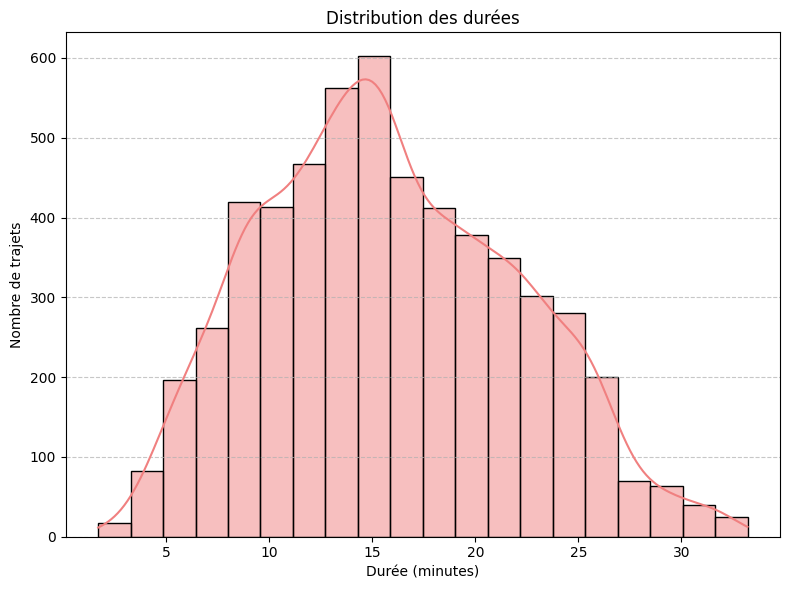

Graphique enregistré sous : analysis_clean_histogram_durations.png


In [3]:
# Vérification préalable :
# Le DataFrame 'df' doit exister et contenir des données
if 'df' in locals() and not df.empty:
    print("--- Génération de l'histogramme des durées ---")

    # Création de la figure et définition de sa taille
    plt.figure(figsize=(8, 6))

    # Tracé de l'histogramme des durées (en minutes)
    sns.histplot(
        df['duration_min'],
        bins=20,
        kde=True,
        color='lightcoral',
        edgecolor='black'
    )

    # Ajout des éléments descriptifs du graphique
    plt.title('Distribution des durées')
    plt.xlabel('Durée (minutes)')
    plt.ylabel('Nombre de trajets')

    # Ajout d'une grille horizontale pour améliorer la lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustement automatique des marges
    plt.tight_layout()

    # Sauvegarde du graphique dans un fichier image
    plt.savefig(f"{output_prefix}histogram_durations.png")

    # Affichage du graphique
    plt.show()

    # Confirmation de l'enregistrement du fichier
    print(f"Graphique enregistré sous : {output_prefix}histogram_durations.png")

else:
    # Message d'erreur si le DataFrame est absent ou vide
    print("Erreur : le DataFrame 'df' est vide ou n'a pas été chargé correctement.")

--- Génération de l'histogramme des distances ---


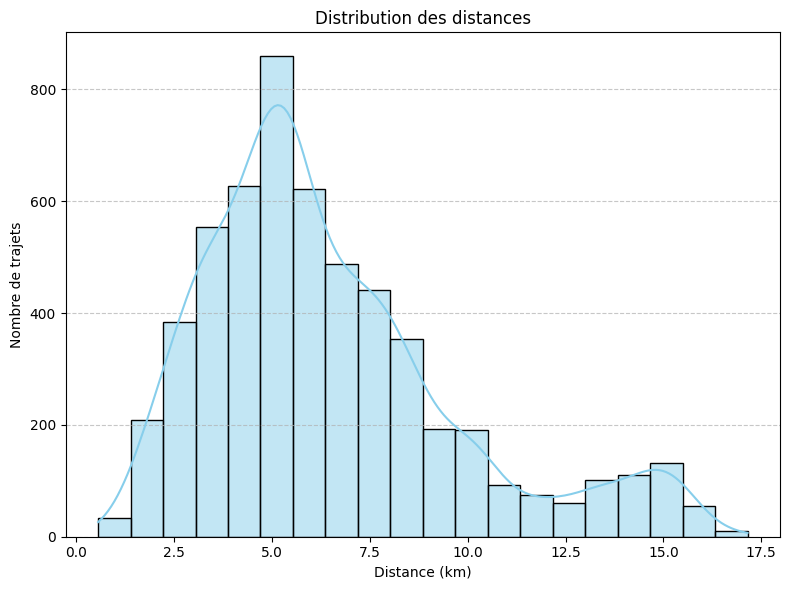

Graphique enregistré sous : analysis_clean_histogram_distances.png


In [4]:
# Vérification préalable :
# Le DataFrame 'df' doit être chargé et contenir des données exploitables
if 'df' in locals() and not df.empty:
    print("--- Génération de l'histogramme des distances ---")

    # Création de la figure et définition de sa taille
    plt.figure(figsize=(8, 6))

    # Tracé de l'histogramme des distances (en kilomètres)
    sns.histplot(
        df['distance_km'],
        bins=20,
        kde=True,
        color='skyblue',
        edgecolor='black'
    )

    # Ajout des éléments descriptifs du graphique
    plt.title('Distribution des distances')
    plt.xlabel('Distance (km)')
    plt.ylabel('Nombre de trajets')

    # Ajout d'une grille horizontale pour améliorer la lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustement automatique des marges
    plt.tight_layout()

    # Sauvegarde du graphique dans un fichier image
    plt.savefig(f"{output_prefix}histogram_distances.png")

    # Affichage du graphique
    plt.show()

    # Confirmation de l'enregistrement du fichier
    print(f"Graphique enregistré sous : {output_prefix}histogram_distances.png")

else:
    # Message d'erreur si le DataFrame est absent ou vide
    print("Erreur : le DataFrame 'df' est vide ou n'a pas été chargé correctement.")

## Relation entre distance et durée des trajets

Graphique de régression linéaire est utilisé pour étudier la relation entre la durée
d’un trajet et la distance parcourue. Cela permet d’identifier
une tendance globale et d’évaluer la cohérence des données.


--- Génération du graphique distance en fonction du temps ---


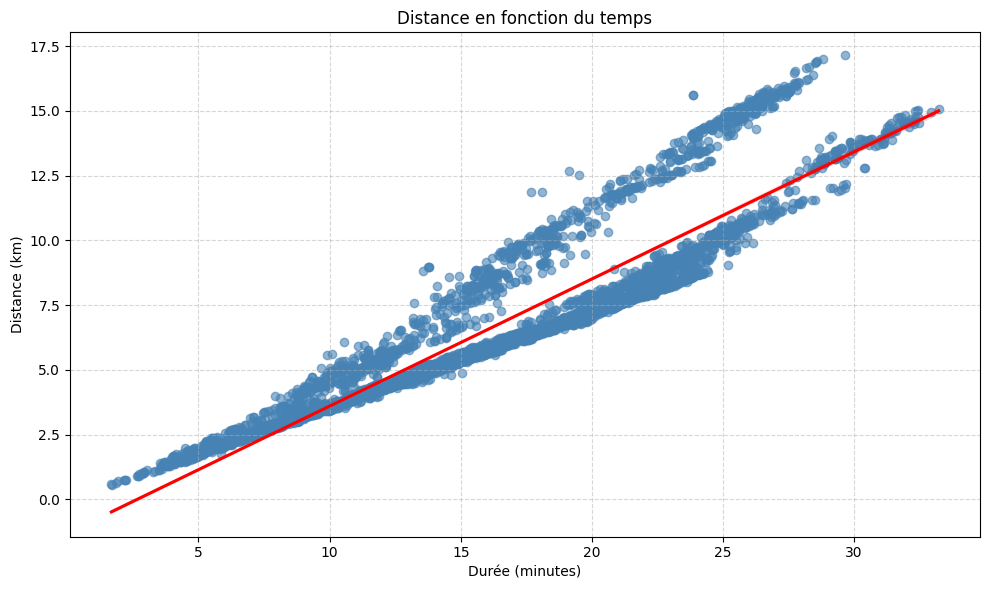

Graphique enregistré sous : analysis_clean_regression.png


In [5]:
# Vérification préalable :
# Le DataFrame 'df' doit être chargé et contenir des données valides
if 'df' in locals() and not df.empty:
    print("--- Génération du graphique distance en fonction du temps ---")

    # Création de la figure et définition de sa taille
    plt.figure(figsize=(10, 6))

    # Tracé du graphique de régression :
    # - points représentant les observations individuelles
    # - droite de régression illustrant la tendance globale
    sns.regplot(
        data=df,
        x='duration_min',
        y='distance_km',
        scatter_kws={
            'alpha': 0.6,
            'color': 'steelblue'
        },
        line_kws={
            'color': 'red'
        }
    )

    # Ajout des éléments descriptifs du graphique
    plt.title('Distance en fonction du temps')
    plt.xlabel('Durée (minutes)')
    plt.ylabel('Distance (km)')

    # Ajout d'une grille pour améliorer la lisibilité
    plt.grid(True, linestyle='--', alpha=0.5)

    # Ajustement automatique des marges
    plt.tight_layout()

    # Sauvegarde du graphique dans un fichier image
    plt.savefig(f"{output_prefix}regression.png")

    # Affichage du graphique
    plt.show()

    # Confirmation de l'enregistrement du fichier
    print(f"Graphique enregistré sous : {output_prefix}regression.png")

else:
    # Message d'erreur si le DataFrame est absent ou vide
    print("Erreur : le DataFrame 'df' est vide ou n'a pas été chargé correctement.")

## Clustering des points

Afin d’identifier des zones géographiques, un clustering K-Means
est appliqué sur les coordonnées des points (latitude et longitude).

La méthode du coude est utilisée pour estimer le nombre optimal de clusters
avant l’application finale du modèle.
Ici, après analyse, le nombre de cluster "parfait" serait de 5 or étant donné que nous avons plus de 5000 points çe ferait beaucoup trop de points à traiter notamment pour déterminer l'ordre optimale de visite plus tard et par soucis de cohérence notamment pour le nombre de points que pourrait traiter un seul livreur, nous avons décider d'opter pour 10 clusters



--- Clustering : recherche du nombre optimal de clusters (méthode du coude) ---
Calcul de l'inertie pour des valeurs de K allant de 2 à 11...


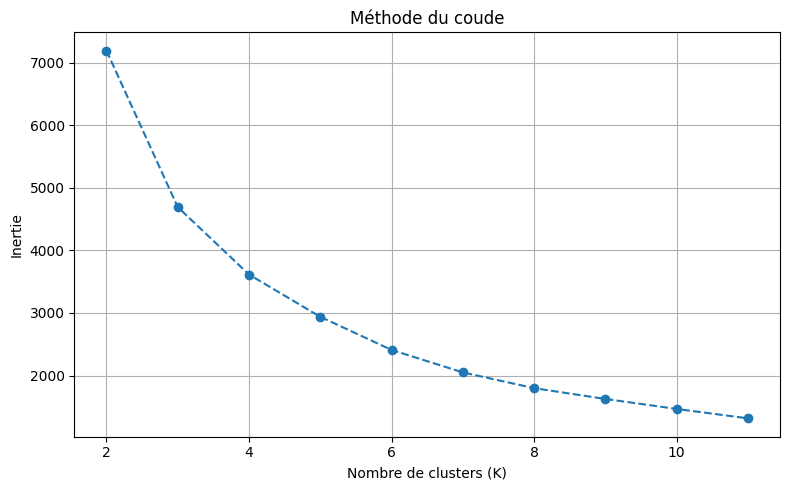

Le graphique de la méthode du coude a été généré. Le point d'inflexion permet d'estimer le nombre optimal de clusters.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Vérification préalable :
# Le DataFrame 'df' doit être chargé et défini depuis une cellule précédente.
# En cas de besoin, le chargement peut être effectué manuellement :
#
# file_path = "test_ML.csv"
# delimiter = ","
# df = pd.read_csv(file_path, delimiter=delimiter)

if 'df' in locals() and not df.empty:
    print("\n--- Clustering : recherche du nombre optimal de clusters (méthode du coude) ---")

    # Sélection des variables géographiques utilisées pour le clustering
    coords = df[['destination_lat', 'destination_lon']]

    # Normalisation des données afin de garantir une échelle comparable
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    # Application de la méthode du coude (Elbow Method)
    inertia = []
    k_range = range(2, 12)  # Test de 2 à 11 clusters

    print(f"Calcul de l'inertie pour des valeurs de K allant de {min(k_range)} à {max(k_range)}...")

    for k in k_range:
        kmeans = KMeans(
            n_clusters=k,
            n_init=10,
            random_state=42
        )
        kmeans.fit(coords_scaled)
        inertia.append(kmeans.inertia_)

    # Visualisation de la méthode du coude
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.title('Méthode du coude')
    plt.xlabel('Nombre de clusters (K)')
    plt.ylabel('Inertie')
    plt.grid(True)

    # Ajustement automatique des marges
    plt.tight_layout()

    # Sauvegarde du graphique
    plt.savefig(f"{output_prefix}elbow.png")

    # Affichage du graphique
    plt.show()

    # Fermeture explicite de la figure
    plt.close()

    print(
        "Le graphique de la méthode du coude a été généré. "
        "Le point d'inflexion permet d'estimer le nombre optimal de clusters."
    )

else:
    # Message d'erreur si le DataFrame est absent ou vide
    print(
        "Erreur : le DataFrame 'df' est introuvable ou vide. "
        "Veuillez exécuter la cellule de chargement des données au préalable."
)

## Visualisation sur une carte des clusters

Les résultats du clustering sont visualisés sur une carte afin
d’illustrer la répartition géographique des clusters. Chaque point représente
une destination, colorée selon le cluster auquel elle appartient.



--- Clustering : application de K-Means avec K = 10 ---
Clustering appliqué. Les clusters sont numérotés de 1 à 10.

Répartition des trajets par cluster :
cluster
1     429
2     500
3     417
4     611
5     478
6     849
7     514
8     644
9     855
10    293
Name: count, dtype: int64


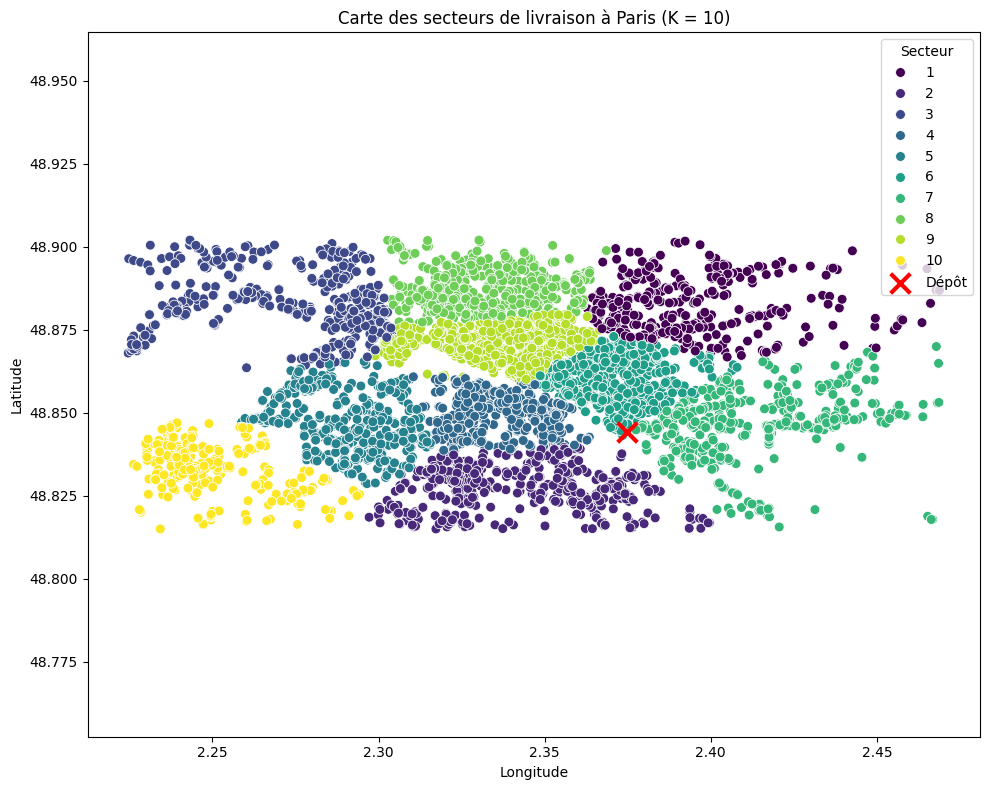

La carte 'analysis_clean_clusters_map.png' a été générée avec succès.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ============================================================
# Configuration
# ============================================================

# On suppose que les objets suivants ont été définis précédemment :
# - df : DataFrame contenant les données
# - coords_scaled : coordonnées normalisées (latitude / longitude)
#
# Pour exécuter ce bloc indépendamment :
# df = pd.read_csv("test_ML.csv", delimiter=",")
# scaler = StandardScaler()
# coords_scaled = scaler.fit_transform(df[['destination_lat', 'destination_lon']])

# Nombre de clusters retenu après analyse (méthode du coude)
K_OPTIMAL = 10


# ============================================================
# Application du clustering K-Means et visualisation
# ============================================================

if 'df' in locals() and not df.empty and 'coords_scaled' in locals():
    print(f"\n--- Clustering : application de K-Means avec K = {K_OPTIMAL} ---")

    # Initialisation et entraînement du modèle K-Means
    kmeans = KMeans(
        n_clusters=K_OPTIMAL,
        n_init=10,
        random_state=42
    )

    # Attribution des clusters aux trajets
    # Les labels sont incrémentés de 1 pour une numérotation plus lisible
    df['cluster'] = kmeans.fit_predict(coords_scaled) + 1

    # Affichage des informations de répartition
    print(f"Clustering appliqué. Les clusters sont numérotés de 1 à {K_OPTIMAL}.")
    print("\nRépartition des trajets par cluster :")
    print(df['cluster'].value_counts().sort_index())

    # ========================================================
    # Visualisation spatiale des clusters
    # ========================================================

    plt.figure(figsize=(10, 8))

    # Nuage de points géographiques coloré par cluster
    sns.scatterplot(
        data=df,
        x='destination_lon',
        y='destination_lat',
        hue='cluster',
        palette='viridis',
        s=50,
        legend='full'
    )

    # Position du dépôt (référence géographique)
    depot_lat, depot_lon = 48.8443, 2.3748
    plt.scatter(
        depot_lon,
        depot_lat,
        c='red',
        s=200,
        marker='x',
        linewidths=3,
        label='Dépôt'
    )

    # Mise en forme du graphique
    plt.title(f'Carte des secteurs de livraison à Paris (K = {K_OPTIMAL})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Secteur')
    plt.axis('equal')
    plt.tight_layout()

    # Sauvegarde du graphique
    output_prefix = "analysis_clean_"
    plt.savefig(f"{output_prefix}clusters_map.png")

    # Affichage et fermeture de la figure
    plt.show()
    plt.close()

    print(f"La carte '{output_prefix}clusters_map.png' a été générée avec succès.")

else:
    # Message d'erreur si les données nécessaires ne sont pas disponibles
    print(
        "Erreur : le DataFrame 'df' ou la variable 'coords_scaled' est introuvable. "
        "Veuillez exécuter les étapes de chargement et de préparation des données."
    )

## Vérification de la zone de collecte des données

Une carte est générée afin de vérifier visuellement que l’ensemble
des points collectés se situe bien à l’intérieur de la bounding box définie
lors de la phase de collecte des données.




In [8]:
import pandas as pd
import folium

# ============================================================
# Configuration
# ============================================================

# Chemin vers le fichier de données
# Ce fichier doit contenir l'ensemble des points collectés
file_path = "nouveaux_trajets.csv"

# Délimiteur du fichier CSV
delimiter = ","

# Nom du fichier HTML de sortie
output_html = "verification_bounding_box.html"


# ============================================================
# Définition de la Bounding Box
# ============================================================

# Bounding Box utilisée lors de la collecte des données
# Format : [latitude sud, longitude ouest], [latitude nord, longitude est]
bbox_coords = [
    [48.815, 2.224],  # Coin sud-ouest
    [48.902, 2.469]   # Coin nord-est
]


# ============================================================
# Chargement des données
# ============================================================

try:
    df = pd.read_csv(file_path, delimiter=delimiter)
    print(f"Dataset chargé : {len(df)} points.")
except FileNotFoundError:
    print(f"Erreur : le fichier '{file_path}' est introuvable.")
    exit()


# ============================================================
# Création de la carte de vérification
# ============================================================

print("Génération de la carte de vérification...")

# Initialisation de la carte centrée sur Paris
m = folium.Map(
    location=[48.8566, 2.3522],
    zoom_start=12,
    tiles='cartodbpositron'
)

# ------------------------------------------------------------
# 1. Ajout du rectangle représentant la Bounding Box
# ------------------------------------------------------------

folium.Rectangle(
    bounds=bbox_coords,
    color='#ff7800',
    fill=True,
    fill_color='#ffff00',
    fill_opacity=0.2,
    weight=2,
    popup='Zone de collecte (Paris intra-muros)'
).add_to(m)


# ------------------------------------------------------------
# 2. Ajout des points du jeu de données
# ------------------------------------------------------------

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['destination_lat'], row['destination_lon']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row.get('destination_name', 'Point')
    ).add_to(m)


# ------------------------------------------------------------
# 3. Ajout du dépôt
# ------------------------------------------------------------

depot_lat, depot_lon = 48.8443, 2.3748
folium.Marker(
    location=[depot_lat, depot_lon],
    popup="Gare de Lyon (Dépôt)",
    icon=folium.Icon(color='red', icon='star')
).add_to(m)


# ============================================================
# Sauvegarde de la carte
# ============================================================

m.save(output_html)
print(f"Carte de vérification générée : {output_html}")
print(
    "Ouvrez ce fichier HTML afin de vérifier que l'ensemble des points "
    "se situe bien à l'intérieur de la zone de collecte."
)


Erreur : le fichier 'nouveaux_trajets.csv' est introuvable.
Génération de la carte de vérification...
Carte de vérification générée : verification_bounding_box.html
Ouvrez ce fichier HTML afin de vérifier que l'ensemble des points se situe bien à l'intérieur de la zone de collecte.
